<a href="https://colab.research.google.com/github/KhaingLae/TensorFlow_DeepLearning_Bootcamp/blob/main/04_tensor_learning_in_tensorflow_part1_feature_extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transfer Learning with TensorFlow Part 1: Feature Extraction

Transfer learning is leveraging a working model's existing architecture and learning patterns for our own problem:

There are two main benefits:
1. can leverage an existing neural network architecture proven to work on problems similar to our own.
2. Can leverage network architecture which has already learned patterns on similar data to our own, then we can adapt those patterns to our own data.

In [ ]:
# Are we using a GPU?
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


## Downloading and becoming one with the data


In [ ]:
# Get data (10% of 10 food claess from Food101)
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

zip_ref = zipfile.ZipFile("10_food_classes_10_percent.zip")
zip_ref.extractall()
zip_ref.close()

--2025-04-07 03:44:09--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.101.207, 142.251.2.207, 142.250.141.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.101.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   210MB/s    in 0.8s    

2025-04-07 03:44:10 (210 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [ ]:
import os
# Walk thorough 10 percent of data directory
for dirpath, dirnames, filenames in os.walk("10_food_classes_10_percent"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'. ")

There are 2 directories and 0 images in '10_food_classes_10_percent'. 
There are 10 directories and 0 images in '10_food_classes_10_percent/train'. 
There are 0 directories and 75 images in '10_food_classes_10_percent/train/pizza'. 
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_wings'. 
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ice_cream'. 
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ramen'. 
There are 0 directories and 75 images in '10_food_classes_10_percent/train/sushi'. 
There are 0 directories and 75 images in '10_food_classes_10_percent/train/hamburger'. 
There are 0 directories and 75 images in '10_food_classes_10_percent/train/steak'. 
There are 0 directories and 75 images in '10_food_classes_10_percent/train/fried_rice'. 
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_curry'. 
There are 0 directories and 75 images in '10_food_classes_10_perce

## Creating data loaders (preparing the data)

In [ ]:
# Setup data inputs
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SHAPE = (224, 224)
BATCH_SIZE = 32

train_dir = "10_food_classes_10_percent/train"
test_dir = "10_food_classes_10_percent/test"

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

print("Training images:")
train_data_10_percent = train_datagen.flow_from_directory(train_dir,
                                                          target_size = IMAGE_SHAPE,
                                                          batch_size= BATCH_SIZE,
                                                          class_mode="categorical")

print("Testing images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size = IMAGE_SHAPE,
                                             batch_size = BATCH_SIZE,
                                             class_mode = "categorical" )




Training images:
Found 750 images belonging to 10 classes.
Testing images:
Found 2500 images belonging to 10 classes.


## Setting up callbacks ( things to run whilst our model trains)

Callbacks are extra functionality you can add to your models to be performed during or after training. Some of the most popular callbacks:

* Tracking experiments with the TensorBoard callback
* Model checkpoint with the ModelCheckpoint callback
* Stopping a model from training (before it trains too long and overfits) with the EarlyStopping callback

In [ ]:
# Create TensorBoard Callback
import datetime
import tensorflow as tf
def create_tensorboard_callback(dir_name, experiment_name):
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)
  print(f"Saving TensorBoard log file to: {log_dir}")
  return tensorboard_callback

## Creating models using TensorFlow Hub

In the past we've used TensorFlow to create our own models layer by layer from scatch.

Now we're going to do a similar process, except the majority of our model's layers are going t come from TensorFlow Hub.

We can access pretrained models on; https://www.kaggle.com/models

Browsing the Kaggle Models page, we found the feature model link:
https://www.kaggle.com/models/google/efficientnet-v2/tensorFlow2/imagenet1k-b0-feature-vector





In [ ]:
# Let's  compare the following two models
resnet_url = "https://www.kaggle.com/models/google/resnet-v2/TensorFlow2/101-feature-vector/2"

efficient_url = "https://www.kaggle.com/models/google/efficientnet-v2/TensorFlow2/imagenet1k-b0-feature-vector/2"



In [ ]:
# Downgrade tensorflow, tensorflow-hub and keras to be compatable
!pip install tensorflow==2.15.0 tensorflow-hub keras==2.15.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.9 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of tf-keras to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.3/475.3 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 70.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 23.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 87.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 22.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 90.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 35.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 73.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 8.1 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt

In [ ]:
import tensorflow_hub as hub
import tensorflow as tf
from tensorflow.keras import layers


# Let's make a creat_model function to create a model from a URL
def create_model(model_url, num_classes=10):
  '''
  Takes a Kaggle Model and crates a keras sequential model with it.
  Args:
    model_url (str:) : A TensorFlow Hub feature extraction URL.
    num_classes (int) : Number of output neurons in the output layer, should be
    equal to number of target classes, default 10.
  Returns:
    An uncompiled Keras Sequential model with model_url as feature extractor
    layer and Dense output layer with num_classes output neurons.
    '''

  # Download the pretrained model and save it as a Keras layer
  feature_extractor_layer = hub.KerasLayer(model_url,
                                           trainable= False, # freeze the already learned patterns
                                           name= "feature_extraction_layer",
                                           input_shape = IMAGE_SHAPE+(3,))
  # Create our own model
  model = tf.keras.Sequential([ # Wrap the layers in a list when initializing the Sequential model
      feature_extractor_layer,
      layers.Dense(num_classes, activation="softmax", name="output_layer")
  ])

  return model



### Creating and testing ResNet Model

In [ ]:
# Create Resnet model
resnet_model = create_model(resnet_url, num_classes=train_data_10_percent.num_classes)

In [ ]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (  (None, 2048)              42626560  
 KerasLayer)                                                     
                                                                 
 output_layer (Dense)        (None, 10)                20490     
                                                                 
Total params: 42647050 (162.69 MB)
Trainable params: 20490 (80.04 KB)
Non-trainable params: 42626560 (162.61 MB)
_________________________________________________________________


In [ ]:
train_data_10_percent.num_classes

10

In [ ]:
# Compile our resnet model
resnet_model.compile(loss="categorical_crossentropy",
                     optimizer = tf.keras.optimizers.Adam(),
                     metrics=["accuracy"])

In [ ]:
# Fit the resnet model
resnet_history = resnet_model.fit(train_data_10_percent,
                                  epochs=5,
                                  steps_per_epoch=len(train_data_10_percent),
                                  validation_data=test_data,
                                  validation_steps=len(test_data),
                                  callbacks=[create_tensorboard_callback(
                                      dir_name="tensorflow_hub",
                                      experiment_name="resnet50V2"
                                  )])

Saving TensorBoard log file to: tensorflow_hub/resnet50V2/20250407-034747
Epoch 1/5
24/24 [==============================] - 1040s 44s/step - loss: 2.0113 - accuracy: 0.3600 - val_loss: 1.1775 - val_accuracy: 0.6220
Epoch 2/5
24/24 [==============================] - 1027s 44s/step - loss: 0.8851 - accuracy: 0.7480 - val_loss: 0.8019 - val_accuracy: 0.7420
Epoch 3/5
24/24 [==============================] - 976s 42s/step - loss: 0.5936 - accuracy: 0.8320 - val_loss: 0.7085 - val_accuracy: 0.7720
Epoch 4/5
24/24 [==============================] - 1025s 44s/step - loss: 0.4576 - accuracy: 0.8787 - val_loss: 0.6833 - val_accuracy: 0.7832
Epoch 5/5
24/24 [==============================] - 1026s 44s/step - loss: 0.3556 - accuracy: 0.9253 - val_loss: 0.6418 - val_accuracy: 0.7908


Our transfer learning fetures extractor model out performed ALL of the previous mdoels we built by hand (substantially) with only 10% of the training examples.

In [ ]:
# Let's create a function to plot our loss curves
# Tidbit: you could put a fintion like this into a script called "helper.py" and import
# from helper import plot_loss_curves

import matplotlib.pyplot as plt

# Plot the validation and training curves
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.

  Args:
    history : TensorFlow History object.

  Returns:
    Plots of training/validation loss and accuracy metrics.

  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']
  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend()

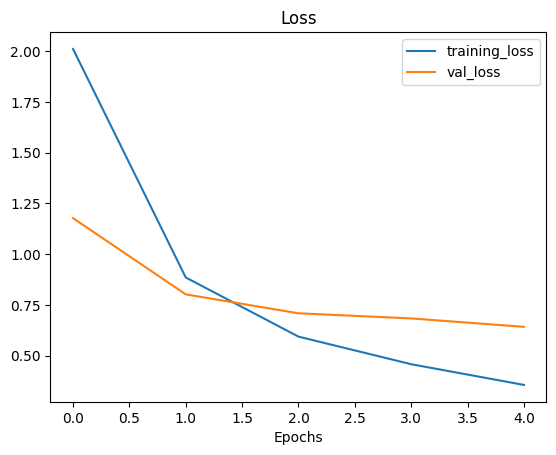

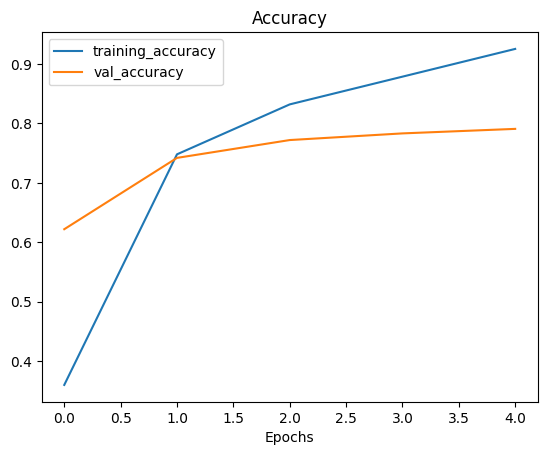

In [ ]:
plot_loss_curves(resnet_history)

### Creating and testing EfficientNetB0

In [ ]:
# Create EfficientNetB0 Feature Extractor
efficientnet_model = create_model(model_url= efficient_url, num_classes=train_data_10_percent.num_classes)

# Compile EfficientNet Model
efficientnet_model.compile(loss="categorical_crossentropy",
                           optimizer=tf.keras.optimizers.Adam(),
                           metrics=["accuracy"])

# Fit EfficientNet Model
efficientnet_history = efficientnet_model.fit(train_data_10_percent,
                                                epochs=5,
                                                steps_per_epoch=len(train_data_10_percent),
                                                validation_data=test_data,
                                                validation_steps=len(test_data),
                                                callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub",
                                                                                       experiment_name="efficientnetB0")])

Saving TensorBoard log file to: tensorflow_hub/efficientnetB0/20250407-051620
Epoch 1/5
24/24 [==============================] - 203s 8s/step - loss: 2.0324 - accuracy: 0.3000 - val_loss: 1.5918 - val_accuracy: 0.5644
Epoch 2/5
24/24 [==============================] - 182s 8s/step - loss: 1.3631 - accuracy: 0.6627 - val_loss: 1.1683 - val_accuracy: 0.6888
Epoch 3/5
24/24 [==============================] - 173s 7s/step - loss: 1.0348 - accuracy: 0.7493 - val_loss: 0.9807 - val_accuracy: 0.7368
Epoch 4/5
24/24 [==============================] - 172s 7s/step - loss: 0.8651 - accuracy: 0.7880 - val_loss: 0.8776 - val_accuracy: 0.7492
Epoch 5/5
24/24 [==============================] - 183s 8s/step - loss: 0.7485 - accuracy: 0.8293 - val_loss: 0.8178 - val_accuracy: 0.7616


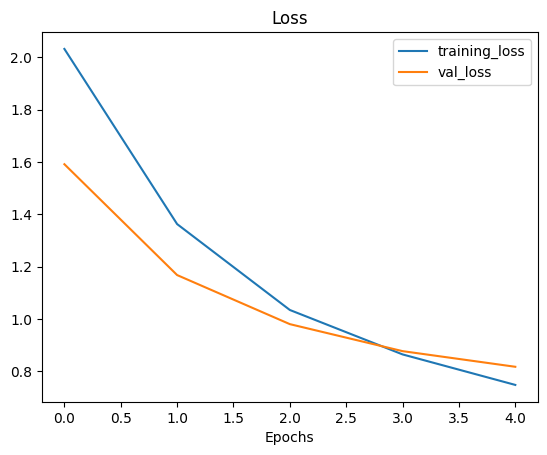

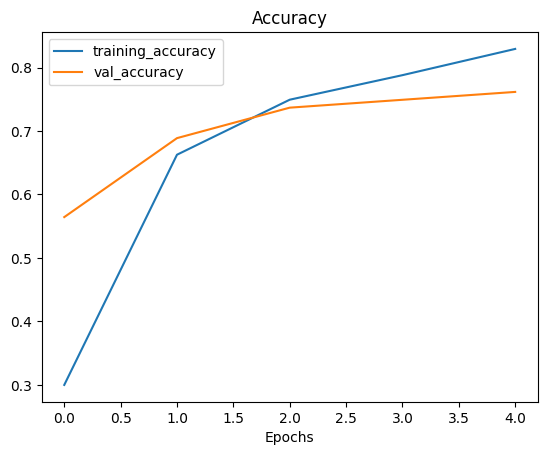

In [ ]:
plot_loss_curves(history=efficientnet_history)

In [ ]:
# How many layers in efficientNetb0
len(efficientnet_model.layers[0].weights)

359

## Different types of transfer learning

* **"As is" transfer learning** - using an existing model with no changes what so ever (e.g using ImageNet model on 1000 ImageNet classes, non of your own)
* **"Feature extraction" transfer learning** - use the prelearned patterns of an existing model (e.g. EfficentNetB0 trained on ImageNet) and adjust the output layer for your own problem (e.g. 1000 classes -> 10 classes of food)
* **Fine-tuning" transfer learning** - use the prelearned patterns of an existing model and "fine-tune" many or all of the underlying layers (including new output layers)

## Comparing our models results using TensorBoard

In [ ]:
# Upload TensorBoard dev records
!tensorboard dev upload --logdir ./tensorflow_hub/ \
--name "EfficientNetB0 vs. ResNet50V2" \
--description "Comparing two different TF Hub feature extraction model architectures using 10% of training data" \
--one_shot

2025-04-07 05:38:05.023928: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-04-07 05:38:05.023993: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-04-07 05:38:05.025426: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-07 05:38:06.361922: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
****************************************************************
****************************************************************
****************************************************************

Uploading TensorBoard logs to https://tensorb

In [ ]:
!tensorboard dev list

2025-04-07 05:46:38.740826: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-04-07 05:46:38.740910: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-04-07 05:46:38.742807: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-07 05:46:40.118201: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

***** TensorBoard.dev Uploader *****

This will list all experiments that you've uploaded to
https://tensorboard.dev. TensorBoard.dev experiments are visible
to everyone. Do not upload sensitive data.

Your use of this service is subject to